Epoch 0, Loss: 1.0623277425765991, Accuracy: 0.4716666666666667
Epoch 10, Loss: 0.800055205821991, Accuracy: 0.5541666666666667
Epoch 20, Loss: 0.8602179884910583, Accuracy: 0.5633333333333334
Epoch 30, Loss: 1.1053314208984375, Accuracy: 0.5675
Epoch 40, Loss: 1.0243864059448242, Accuracy: 0.563125
Epoch 50, Loss: 1.0569427013397217, Accuracy: 0.558125
Epoch 60, Loss: 0.8775023221969604, Accuracy: 0.5547916666666667
Epoch 70, Loss: 0.5520371794700623, Accuracy: 0.555625
Epoch 80, Loss: 1.1164662837982178, Accuracy: 0.5591666666666667
Epoch 90, Loss: 0.736023485660553, Accuracy: 0.5614583333333333
Epoch 100, Loss: 0.6270865797996521, Accuracy: 0.5554166666666667
Epoch 110, Loss: 0.7578688859939575, Accuracy: 0.566875
Epoch 120, Loss: 0.7865082025527954, Accuracy: 0.5608333333333333
Epoch 130, Loss: 0.8327087163925171, Accuracy: 0.5666666666666667
Epoch 140, Loss: 1.0959391593933105, Accuracy: 0.5570833333333334
Epoch 150, Loss: 1.5137310028076172, Accuracy: 0.5610416666666667
Epoch 160

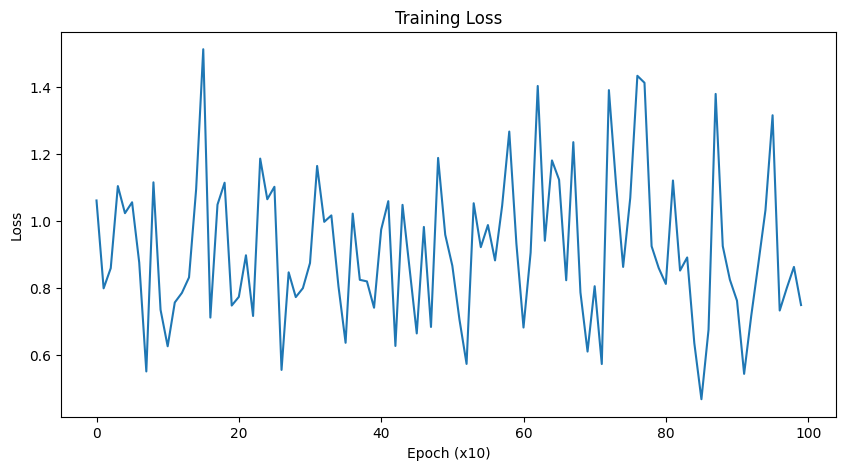

Accuracy of the network on test data: 58.666667 %


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import matplotlib.pyplot as plt
import numpy as np

torch.manual_seed(0)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Define the network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(100, 30)
        self.dropout1 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(30, 20)
        self.dropout2 = nn.Dropout(0.2)
        self.fc4 = nn.Linear(20, 3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        self.dropout1(x)
        x = torch.relu(self.fc3(x))
        self.dropout2(x)
        x = self.fc4(x)
        return x

def binary_to_bits(binary_list):
    return [[[int(i) for i in str(bit)] for bit in binary_string][0] for binary_string in binary_list]
data = np.loadtxt("AI_2qubits_training_data.txt", dtype = str)
X = torch.tensor(np.array(binary_to_bits(data[:,:-1])))
Y = torch.tensor(data[:,-1].astype(int))-1

# Create the network
net = Net().to(device)

# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
torch.manual_seed(89)
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Create a dataset from X and y
dataset = TensorDataset(X.float(), Y.long())

# Decide on the sizes of the splits
train_size = int(0.8 * len(dataset))  # 50% for training
test_size = len(dataset) - train_size  # 50% for testing

# Use random_split to split the dataset
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create data loaders for the train and test datasets
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=True)

# Function to calculate accuracy
def get_accuracy(loader, model):
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

# Lists to store losses and accuracies for plotting
losses = []
accuracies = []

# Train the network
for epoch in range(1000):  # 500 epochs
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        #Add regularization
        l1_norm = sum(p.abs().sum() for p in net.parameters())
        loss+=0.002*l1_norm
        loss.backward()
        optimizer.step()

    # Print loss and accuracy every 10 epochs
    if epoch % 10 == 0:
        train_acc = get_accuracy(train_loader, net)
        print(f"Epoch {epoch}, Loss: {loss.item()}, Accuracy: {train_acc}")
        losses.append(loss.item())
        accuracies.append(train_acc)

print("Training is complete!")

# Plot the training loss
plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch (x10)')
plt.ylabel('Loss')
plt.show()

# Test the network
net.eval()  # Set the network to evaluation mode
test_acc = get_accuracy(test_loader, net)
print('Accuracy of the network on test data: %f %%' % (100 * test_acc))


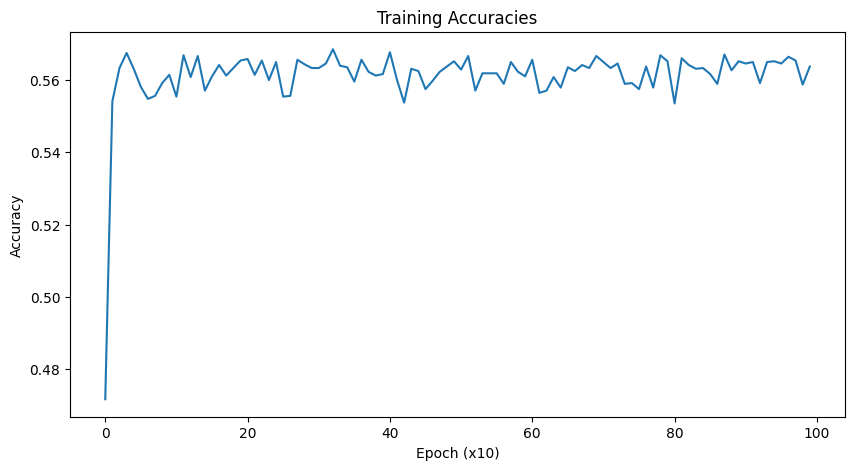

In [2]:
# Plot the training loss
plt.figure(figsize=(10, 5))
plt.plot(accuracies)
plt.title('Training Accuracies')
plt.xlabel('Epoch (x10)')
plt.ylabel('Accuracy')
plt.show()